# Fashion MNIST:

Fashion MNIST is dataset similar to MNIST daset,it has images of clothing instead of hand-written digits.
Each photo is 28x28 grayscale, with 10 different classes. 
The dataset contains 70000 images with 60000 for training and 10000 for testing.
The dataset is download from Kaggle.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam


In [2]:
#dataset has a csv files having pixel values of each image and the lable for the corresponding image,
#each row represents an image and first column in each row represents lable, as shown below.


train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [4]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)


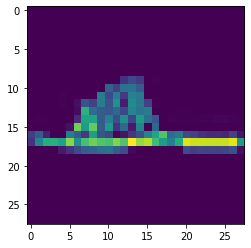

In [5]:
# lets see what the images look like

image = x_train[10, :].reshape((28, 28))

plt.imshow(image)
plt.show()

# Creating the CNN model


In [6]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [7]:

model = Sequential([
    Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                147488    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 148,650
Trainable params: 148,650
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [10]:
model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate)
)

Epoch 1/10
94/94 [==============================] - 30s 323ms/step - loss: 0.7828 - accuracy: 0.7370 - val_loss: 0.4925 - val_accuracy: 0.8243
Epoch 2/10
94/94 [==============================] - 31s 331ms/step - loss: 0.4608 - accuracy: 0.8383 - val_loss: 0.4210 - val_accuracy: 0.8540
Epoch 3/10
94/94 [==============================] - 39s 418ms/step - loss: 0.4075 - accuracy: 0.8563 - val_loss: 0.3721 - val_accuracy: 0.8725
Epoch 4/10
94/94 [==============================] - 34s 363ms/step - loss: 0.3730 - accuracy: 0.8675 - val_loss: 0.3542 - val_accuracy: 0.8794
Epoch 5/10
94/94 [==============================] - 37s 397ms/step - loss: 0.3522 - accuracy: 0.8756 - val_loss: 0.3496 - val_accuracy: 0.8779
Epoch 6/10
94/94 [==============================] - 47s 495ms/step - loss: 0.3389 - accuracy: 0.8799 - val_loss: 0.3281 - val_accuracy: 0.8875
Epoch 7/10
94/94 [==============================] - 42s 442ms/step - loss: 0.3230 - accuracy: 0.8874 - val_loss: 0.3209 - val_accuracy: 0.8894

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.2901
 test acc: 0.8995
